In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#this is the same data that ahs been used for Logistic Regressio Case study. To know more abot the data
#refer to the Logistic regression case study
df=pd.read_csv("quality.csv")#read the csv into python
#print df.columns
#print df.shape

In [9]:
from sklearn.model_selection import train_test_split
good_columns=df.drop(['MemberID','PoorCare'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(good_columns,df['PoorCare'],test_size=0.3,random_state=0)

In [10]:
good_columns.head()

,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall
0,0,0,18,1,731.0,10,18,21,93,222,False,0
1,1,1,6,1,411.0,0,8,27,19,115,False,1
2,0,0,5,3,731.0,10,5,16,27,148,False,5
3,0,1,19,0,158.0,34,20,14,59,242,False,0
4,8,2,19,3,449.0,10,29,24,51,204,False,0


In [11]:
from sklearn import tree

In [12]:
cl_tree=tree.DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=2,min_samples_leaf=20)
#the below 2 parameters can be used to control for Overfitting. Try to play around with these
#and come up with a better model
#max_depth=2 --- defines the depth of the tree.. More depth may lead to Overfitting
#min_samples_leaf=20--- defines when the splitting will stop. here for example
# if a node/BUCKET has less than 20 data pints, it will not go for a further split. This too wil control
#overfitting. Smaller thsi value, more the overfitting.

In [13]:
cl_tree=cl_tree.fit(X_train,y_train)

In [15]:
#lets first predict on the train data
pred_train=cl_tree.predict(X_train)
#for the confusion matrix
print (pd.crosstab(y_train,pred_train))
# since we gave a very small depth &/or Very large value of min_samples_leaf, the Model is Underfit
#it is going for very fewer spilts.... 
Accuracy_train=(55.0+15.0)/(55+15+9+12.0)
print (Accuracy_train) #76%

col_0      0   1
PoorCare        
0         55  12
1          9  15
0.7692307692307693


In [17]:
#use the tree to make prediction
pred=cl_tree.predict(X_test)
#for the confusion matrix
print (pd.crosstab(y_test,pred))
Accuracy_test=(26.0+4.0)/(26+5+5.0+4.0)
print (Accuracy_test)

col_0      0  1
PoorCare       
0         26  5
1          5  4
0.75


In [ ]:
#so we Got 77% on train & 75% on Test.... Both are comparable. 
#it may it is a very simple... or underfit model..lets increease the DEPTH and decrease 
#min_samples_leaf to maek the tree more complex... 

In [ ]:
cl_tree2=tree.DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=12,min_samples_leaf=3)
#THIS MEANS IT WILL GO ON SPLITITNG AS LONG AS IT EITHER REACHES A DEPTH OF 12 OR IT HAS LESS THAN
#3 POINTS IN THE BUCKET......
cl_tree2=cl_tree2.fit(X_train,y_train)
#lets first predict on the train data
pred_train=cl_tree2.predict(X_train)
#for the confusion matrix
print pd.crosstab(y_train,pred_train)
Accuracy_train=(65.0+23.0)/(65+2.0+1.0+23.0)
print Accuracy_train #96.7% better Than before.But we shud make sure performace is good in test as wel
print "*****************"
#use the tree to make prediction o test
pred2=cl_tree2.predict(X_test)
#for the confusion matrix
print pd.crosstab(y_test,pred2)
Accuracy_test=(25.0+6.0)/(25.0+6.0+3.0+6.0)
print Accuracy_test #77.5% on test which is quit good...

In [ ]:
#So accuracy in train = 96% and in test is 77.5%. So we have overfit thr model We will have to go back 
#and decrease the depth of the tree or increase the min_sample_leaf..
#i will leave it to you guys....
#lets SEE HOW A RANDOM FOREST WILL DO...

# Random Forests

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1500,max_features=2,oob_score=True)
#n_estimators== # of trees that you want => No.of samples that will be taken Each a bagged sample.
#max_features=> The max no.of columns to be considered at each decision node..
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [14]:
rfc_pred_train = rfc.predict(X_train)
print pd.crosstab(y_train,rfc_pred_train)

col_0      0   1
PoorCare        
0         67   0
1          0  24


In [15]:
#accuracuy in train by RF
#67+24/TOTAL
#=100% SO THE rF IS DOING 100% ON TRAINING DATA
#LETS SEE ON TEST DATA
rfc_pred_test = rfc.predict(X_test)
print pd.crosstab(y_test,rfc_pred_test)

col_0      0  1
PoorCare       
0         31  0
1          6  3


In [48]:
#accuracy on test
test_accuracy_rf=(31.0+3.0)/(31.0+3.0+6.0+0.0)
print (test_accuracy_rf)

0.85


In [56]:
#85% on test data which is quite good.. Remember the decision tree will seldom or never predict with
#such accuracy

In [57]:
#lets check out what is the OOB error
oob_error = 1 - rfc.oob_score_
print oob_error #20% which is quite less....So we are good..

0.208791208791


In [64]:
#instead of creating the Confusion matrix manually and then findinf the accuracy parameters
#i could have also used this directly---------
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred_test))
print "*********"
print (confusion_matrix(y_test,rfc_pred_test)) # which is the same as what we got manually

             precision    recall  f1-score   support

          0       0.84      1.00      0.91        31
          1       1.00      0.33      0.50         9

avg / total       0.87      0.85      0.82        40

*********
[[31  0]
 [ 6  3]]


In [31]:
features = good_columns.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

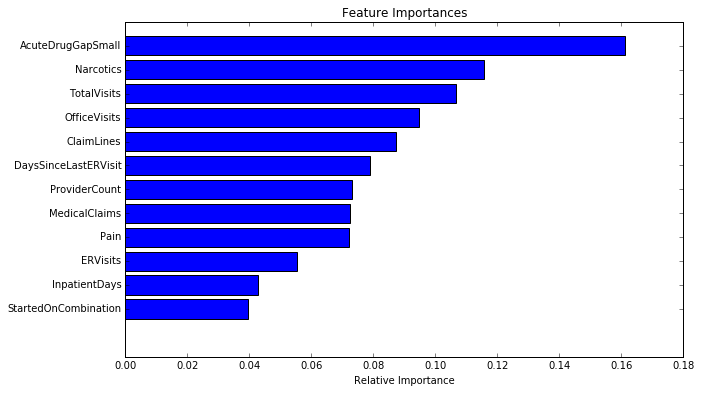

In [40]:
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [41]:
print feature_names# these are the columns used to prepare the RF model.
#out OF THESE THE ABOVE PLOT SHOWS WHICH ARE MORE IMPORTANT AND WHICH ARE LESS IMP

Index([u'ERVisits', u'OfficeVisits', u'Narcotics', u'DaysSinceLastERVisit',
       u'Pain', u'TotalVisits', u'ProviderCount', u'MedicalClaims',
       u'ClaimLines', u'StartedOnCombination', u'AcuteDrugGapSmall'],
      dtype='object')


In [19]:
# THERE CAN BE SEVERAL USAGES OF THE ABOVE PLOT--
#1) FIND OUT WHICH variables(IV's) are causing our variable of interest (DV)
#2) so this helps us find the causality and eliminate less imp variables
#3) we can select the imp variables from the above plot and use them to build a Linear/logistic model
#the lin/logistic models will than be less prone of overfiting as you would have removed unimp ones
#already.